# Neural networks programming with Tensorflow

<sup>This notebook is a part of Natural Language Processing class at the University of Ljubljana, Faculty for computer and information science. Please contact [slavko.zitnik@fri.uni-lj.si](mailto:slavko.zitnik@fri.uni-lj.si) for any comments.</sub>

There exist also some other neural network programming frameworks like [Tensorflow](https://www.tensorflow.org/), for example [PaddlePaddle](http://www.paddlepaddle.org/), [PyTorch](https://pytorch.org/), [Caffe](http://caffe.berkeleyvision.org/), [Keras](https://keras.io/), [Deeplearning4J](https://deeplearning4j.org).

Check the Tensorflow version (v2 is not compatible with v1):

In [1]:
import tensorflow as tf

print(tf.__version__)

2.4.1


### Simple example

An example of multiplying two numbers:

In [2]:
a = tf.constant(4)
b = tf.constant(5)
c = tf.multiply(a, b)
print(c)

tf.Tensor(20, shape=(), dtype=int32)


The result is not 20 but a tensor without shape attribute and of type *int32*. The Tensorflow 2.0 executes eagerly and therefore we can get the result immediately:

In [3]:
print(c.numpy())

tf.print(c)

20
20


Now we got the result of our computation graph.

### Parameters for the Tensorflow program

Sometimes we do not know all the parameters in advance and would like to additionally feed data later during execution (e.g. training examples). We can pass this parameters to Tensorflow functions. Apart from using Tensorflow functions, we can use existing Python syntax and *AutoGraph* will convert code to appropriate Tensorflow operations. For example:

In [4]:
# Read value from a user
x = int(input("Enter a number to multiply with 5: ") or "10")

# Define the computation graph
@tf.function
def mult(x):
    b = tf.constant(5)
    return tf.multiply(x, b)

@tf.function
def mult_py(x):
    return x * 5

print(mult(x))
print(mult_py(x))

Enter a number to multiply with 5:  25


tf.Tensor(125, shape=(), dtype=int32)
tf.Tensor(125, shape=(), dtype=int32)


### Variables computation

Now let's compute the loss of a training example defined as:

$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2$$

Variables are manipulated via the *tf.Variable* class. A *tf.Variable* represents a tensor whose value can be changed by running operations on it. Specific operations allow you to read and modify the values of this tensor. Higher level libraries like *tf.keras* use *tf.Variable* to store model parameters.

In [5]:
y_hat = tf.constant(67, name='y_hat')            
y = tf.constant(69, name='y')                    

loss = tf.Variable((y - y_hat)**2, name='loss')  

tf.print(loss)           

4


Let's create a variable and then update it within a function:

In [6]:
loss = tf.Variable(0.0, name = "loss")
loss.assign_add(5)

@tf.function
def calculate_loss(y, y_hat):
    v = loss.read_value() 
    print(v)
    tf.print(v)
    loss.assign((y - y_hat)**2)
    
calculate_loss(69, 67)
print(f"Loss object: {loss}")
print(f"Loss value: {loss.read_value()}")

Tensor("Identity:0", shape=(), dtype=float32)
5
Loss object: <tf.Variable 'loss:0' shape=() dtype=float32, numpy=4.0>
Loss value: 4.0


We can observe that within the TensorFlow functions we need to call *tf.print* method to output the desired value.

To compute the cost of a neural network we need to sum all the losses over all the examples. Tensorflow library already contains prepared functions to compute cost. For example, the function `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)` computes the the cross-entropy losses between logits and labels, while logits are outputs of the last unit before the final sigmoid activation. A list of all loss functions is available at [https://www.tensorflow.org/api_docs/python/tf/keras/losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

### Linear function

Let's compute the following equation: $Z = WX + b$, where $W$ and $X$ are random matrices and b is a random vector. 

Tensorflow offers a variety of commonly used neural network functions like `tf.sigmoid` or `tf.softmax`. We are now interested to output $sigmoid(Z)$ values.

In [7]:
import numpy as np
import tensorflow as tf
np.random.seed(1)

# Input value
x_value = np.random.randn(3,1)
    
# Neural network graph
W = tf.Variable(np.random.randn(4,3), name = "W")
b = tf.Variable(np.random.randn(4,1), name = "b")

@tf.function
def calculate_simple_nn(X):
    Z = tf.add(tf.matmul(W,X), b)
    sigmoid = tf.sigmoid(Z)        
    return sigmoid, Z

sigmoid_result, Z_result = calculate_simple_nn(x_value)

print("Zs: \n", Z_result.numpy())
print("Sigmoids: \n", sigmoid_result.numpy())

Zs: 
 [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]
Sigmoids: 
 [[0.10371852]
 [0.95068312]
 [0.25175618]
 [0.30040282]]


The example above will return Z values and their sigmoid values. 

To better understand what is going on, you can use TensorBoard visualization. [Tensorboard](https://www.tensorflow.org/guide/summaries_and_tensorboard) is a visualization tool that enables the overview of training status or just prints a graph of a given neural network. Logs for visualization with Tensorboard will be generated in *logs* folder.

TensorBoard provides the visualization and tooling needed for machine learning experimentation:

* Tracking and visualizing metrics such as loss and accuracy
* Visualizing the model graph (ops and layers)
* Viewing histograms of weights, biases, or other tensors as they change over time
* Projecting embeddings to a lower dimensional space
* Displaying images, text, and audio data
* Profiling TensorFlow programs
* ...

To show log of the above function and see the *AutoGraph* transformation, do the following:

1. Define and annotate a function with *tf.function*.
2. Use *tf.summary.trace_on()* immediately before your function call.
3. Add profile information (memory, CPU time) to graph by passing profiler=True
4. With a Summary file writer, call *tf.summary.trace_export()* to save the log data

In [8]:
## IMPORT STUFF
from datetime import datetime

# Load the TensorBoard notebook extension.
%load_ext tensorboard
#%reload_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/
# Set up Tensorboard logging.
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = 'logs/func/%s' % stamp
writer = tf.summary.create_file_writer(logdir)

## DEFINE FUNCTION
import numpy as np
import tensorflow as tf
np.random.seed(1)

# Input value
x_value = np.random.randn(3,1)
    
# Neural network graph
W = tf.Variable(np.random.randn(4,3), name = "W")
b = tf.Variable(np.random.randn(4,1), name = "b")

@tf.function
def calculate_simple_nn(X):
    Z = tf.add(tf.matmul(W,X), b)
    sigmoid = tf.sigmoid(Z)        
    return sigmoid, Z


## BEFORE FUNCTION
# Start tracing for the TensorBoard
tf.summary.trace_on(graph=True, profiler=True)

## FUNCTION CALL
sigmoid_result, Z_result = calculate_simple_nn(x_value)

## AFTER FUNCTION
# Write TensorBoard logs
with writer.as_default():
  tf.summary.trace_export(
      name="simple_nn_function_trace",
      step=0,
      profiler_outdir=logdir)

## SHOW TENSORBOARD
%tensorboard --logdir logs/func

Instructions for updating:
use `tf.profiler.experimental.start` instead.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Instructions for updating:
`tf.python.eager.profiler` has deprecated, use `tf.profiler` instead.
Instructions for updating:
`tf.python.eager.profiler` has deprecated, use `tf.profiler` instead.


HINT: If you get weird data, restart the notebook kernel, delete files in logs folder and re-run just this part along with Tensorboard.

To run TensorBoard separately, call `tensorboard --logdir=logs` and navigate to [http://localhost:6006](http://localhost:6006) (hint: install a specific version of protobuf if you experience problems: `pip install protobuf==3.8`). 

### A Tensorflow training example

Let's train a simple linear function, where we optimize MSE error and use gradient descent optimizer to minimize error. In this example we create our own model and write a loop for optimization.

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
epochs = 200

# Prepare data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
# Convert data to matrices
x_data = np.asarray(list((map(lambda x: np.asmatrix(x), x_data))))
y_data = np.asarray(list((map(lambda x: np.asmatrix(x), y_data))))

# Build graph (model: y = W * x + b)
inputs = keras.Input(shape=(1,), name = 'digits')
outputs = layers.Dense(1, name = 'predictions')(inputs)
model = keras.Model(inputs=inputs, outputs=outputs)

# Loss function
def loss_mse(y_true, y_pred):
    return tf.math.reduce_mean(tf.square(y_true - y_pred))

optimizer = keras.optimizers.SGD(learning_rate=0.5)

# Train model
print("%s\t%s\t\t%s\t\t%s" % ("Iteration", "Loss", "W", "b"))
for i in range(epochs):
    with tf.GradientTape() as tape:
      logits = model(x_data, training=True)
      loss_value = loss_mse(y_data, logits)

    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    if i % 20 == 0:
        print("%s\t\t%s\t%s\t%s" % (i, loss_value.numpy(), model.trainable_weights[0].numpy()[0][0], model.trainable_weights[1].numpy()[0]))

print("\nBest fit should be:\n\t\t\t\t%s\t\t%s" % (0.1, 0.3))

Iteration	Loss		W		b
0		0.39886802	-0.15562314	0.61099106
20		0.0012131844	-0.05020983	0.37816823
40		0.0009476665	-0.010991004	0.35671434
60		0.00093494356	-0.0024059368	0.35201803
80		0.000934334	-0.00052666164	0.35099003
100		0.0009343047	-0.00011528104	0.350765
120		0.0009343034	-2.5237927e-05	0.35071573
140		0.0009343033	-5.5373234e-06	0.35070494
160		0.0009343032	-1.2021802e-06	0.35070258
180		0.0009343032	-2.743879e-07	0.35070205

Best fit should be:
				0.1		0.3


The example below uses the same model with the TensorFlow's [dataset object](https://www.tensorflow.org/api_docs/python/tf/data/Dataset). It allows for shuffling, batches creation, ... Also, there exist a collection of already available datasets online: [https://www.tensorflow.org/datasets](https://www.tensorflow.org/datasets)

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
epochs = 200

# Prepare data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
# Convert data to matrices
x_data = np.asarray(list((map(lambda x: np.asmatrix(x), x_data))))
y_data = np.asarray(list((map(lambda x: np.asmatrix(x), y_data))))

batch_size = 50
train_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
train_dataset = train_dataset.batch(batch_size)

# Build graph (model: y = W * x + b)
inputs = keras.Input(shape=(1,), name = 'digits')
outputs = layers.Dense(1, name = 'predictions')(inputs)
model = keras.Model(inputs=inputs, outputs=outputs)

# Loss function
def loss_mse(y_true, y_pred):
    return tf.math.reduce_mean(tf.square(y_true - y_pred))

optimizer = keras.optimizers.SGD(learning_rate=0.5)

# Train model
print("%s\t%s\t\t%s\t\t%s" % ("Iteration", "Loss", "W", "b"))
for i in range(epochs):
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
          logits = model(x_batch_train, training=True)
          loss_value = loss_mse(y_batch_train, logits)

        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        if i % 20 == 0:
            print("%s\t\t%s\t%s\t%s" % (i, loss_value.numpy(), model.trainable_weights[0].numpy()[0][0], model.trainable_weights[1].numpy()[0]))

print("\nBest fit should be:\n\t\t\t\t%s\t\t%s" % (0.1, 0.3))

Iteration	Loss		W		b
0		0.12580532	0.14143632	0.35342598
0		0.00876417	0.0849992	0.27685988
20		0.0010499303	0.008435134	0.33793503
20		0.0011482373	0.014990567	0.35113445
40		0.0010615772	0.0048920517	0.33950981
40		0.0011544948	0.012015682	0.35311309
60		0.0010620768	0.004759478	0.33956873
60		0.0011547826	0.01190437	0.3531871
80		0.001062096	0.004754515	0.33957094
80		0.0011547935	0.011900205	0.3531899
100		0.001062096	0.004754358	0.339571
100		0.0011547941	0.011900078	0.35318998
120		0.001062096	0.004754358	0.339571
120		0.0011547941	0.011900078	0.35318998
140		0.001062096	0.004754358	0.339571
140		0.0011547941	0.011900078	0.35318998
160		0.001062096	0.004754358	0.339571
160		0.0011547941	0.011900078	0.35318998
180		0.001062096	0.004754358	0.339571
180		0.0011547941	0.011900078	0.35318998

Best fit should be:
				0.1		0.3


The easiest way to use TensorBoard with a Keras model is using its *fit* method and TensorBoard callback function ([see an example](https://www.tensorflow.org/tensorboard/graphs#train_the_model_and_log_data)). In other cases you can manually define parameters to track and visualize:

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime

# Load the TensorBoard notebook extension.
%load_ext tensorboard
#%reload_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/
# Set up Tensorboard logging.
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = 'logs/func/%s' % stamp

epochs = 200

# Prepare data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
# Convert data to matrices
x_data = np.asarray(list((map(lambda x: np.asmatrix(x), x_data))))
y_data = np.asarray(list((map(lambda x: np.asmatrix(x), y_data))))

batch_size = 100
train_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
train_dataset = train_dataset.batch(batch_size)

# Build graph (model: y = W * x + b)
inputs = keras.Input(shape=(1,), name = 'digits')
outputs = layers.Dense(1, name = 'predictions')(inputs)
model = keras.Model(inputs=inputs, outputs=outputs)

# Loss function
def loss_mse(y_true, y_pred):
    return tf.math.reduce_mean(tf.square(y_true - y_pred))

optimizer = keras.optimizers.SGD(learning_rate=0.5)

# Train model
print("%s\t%s\t\t%s\t\t%s" % ("Iteration", "Loss", "W", "b"))
# Start tracing for the TensorBoard
TC = tf.keras.callbacks.TensorBoard(logdir)
TC.set_model(model)

for i in range(epochs):
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
          logits = model(x_batch_train, training=True)
          loss_value = loss_mse(y_batch_train, logits)

        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        if i % 20 == 0:
            print("%s\t\t%s\t%s\t%s" % (i, loss_value.numpy(), model.trainable_weights[0].numpy()[0][0], model.trainable_weights[1].numpy()[0]))

        TC.on_epoch_end(i, {'loss': loss_value.numpy(), 'W': model.trainable_weights[0].numpy()[0][0], 'b': model.trainable_weights[1].numpy()[0]})
        
print("\nBest fit should be:\n\t\t\t\t%s\t\t%s" % (0.1, 0.3))
TC.on_train_end('_')


## SHOW TENSORBOARD
%tensorboard --logdir logs/func

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Iteration	Loss		W		b
0		0.4436055	1.2680815	-0.50905335
20		0.01639871	0.45327887	0.101961315
40		0.0024873235	0.15376517	0.26739663
60		0.00088645564	0.052161545	0.32351702
80		0.0007022341	0.017694682	0.34255466
100		0.0006810346	0.006002547	0.34901276
120		0.00067859504	0.0020362479	0.35120353
140		0.0006783143	0.0006907564	0.3519467
160		0.000678282	0.00023432607	0.35219884
180		0.00067827833	7.949082e-05	0.35228434

Best fit should be:
				0.1		0.3


Reusing TensorBoard on port 6006 (pid 44104), started 0:00:03 ago. (Use '!kill 44104' to kill it.)

### Recurrent neural networks with Tensorflow

Basic recurrent neural network consist of recurrent units that we can classify into basic, GRU and LSTM:

<table>
  <tr>
      <td><img src="rnn.png" /></td>
      <td><img src="gru.png" /></td>
      <td><img src="lstm.png" /></td>
  </tr>
</table>
<sub>Courtesy of <a href="https://medium.com/@saurabh.rathor092/simple-rnn-vs-gru-vs-lstm-difference-lies-in-more-flexible-control-5f33e07b1e57">https://medium.com/@saurabh.rathor092/simple-rnn-vs-gru-vs-lstm-difference-lies-in-more-flexible-control-5f33e07b1e57</a></sub>

**Simple RNN**: There is a simple multiplication of Input (*xt*) and Previous Output (*ht-1*). Passed through *Tanh* activation function. No Gates present.

**Gated Recurrent Unit (GRU)**: An Update gate is introduced, to decide whether to pass previous output to next cell or not. Forget gate is nothing but additional Mathematical Operations with a new set of weights.

<img src="gru_formula.png" width="500px" />

**Long Short Term Memory Unit (LSTM)**: Two more gates are introduced (Forget and Output) in addition to Update gate of GRU. And again as above, these are additional Mathematical Operations on same inputs (xt and ht-1). So overall, LSTM has introduced two math operations having two new sets of weights.

<img src="lstm_formula.png" width="600px" />

### Recurrent neural networks example

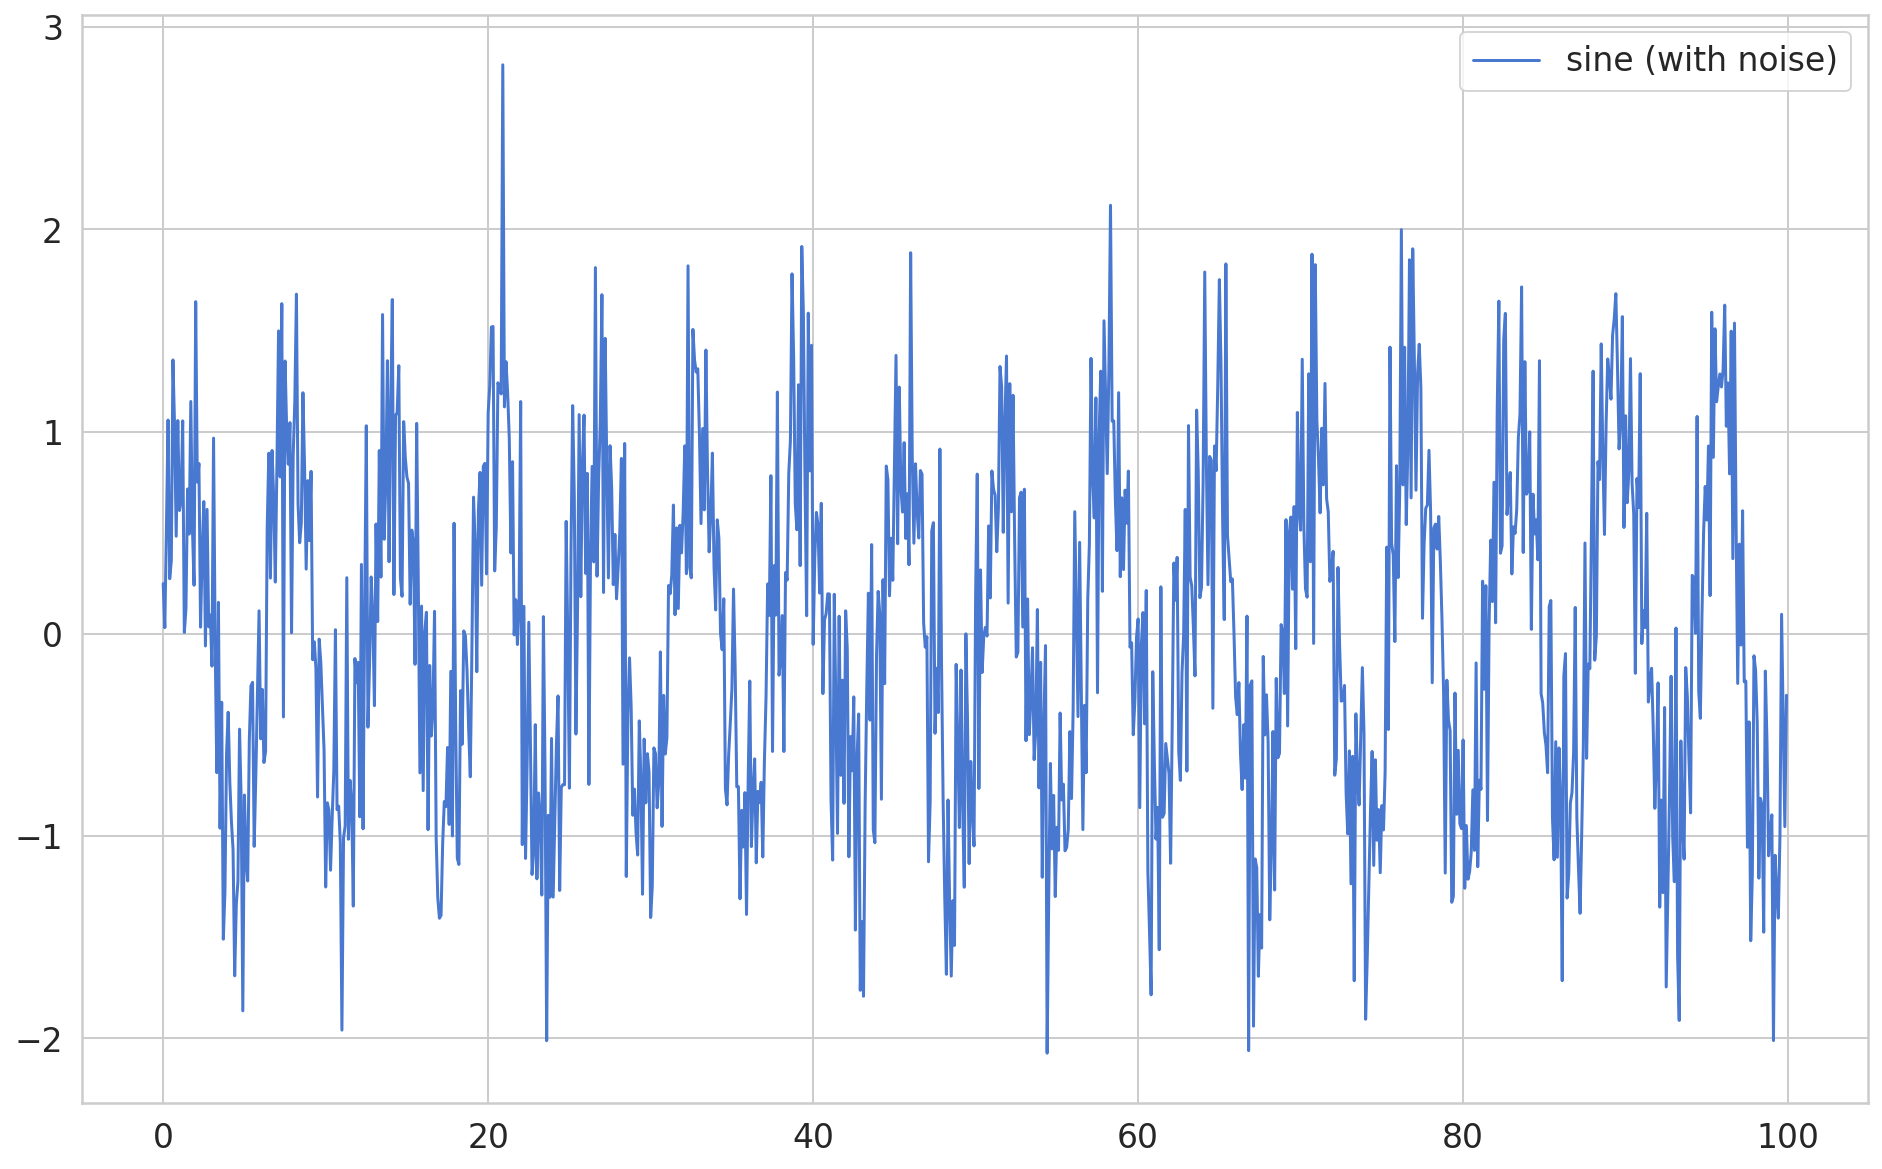

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)


time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

plt.plot(time, sin, label='sine (with noise)');
plt.legend();

In [13]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(f"Train size: {len(train)}, test size: {len(test)}")

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(f" X train shape: {X_train.shape}, y train shape: {y_train.shape}")
print(f" X test shape: {X_test.shape}, y test shape: {y_test.shape}")

model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

y_pred = model.predict(X_test)

Train size: 800, test size: 200
 X train shape: (790, 10, 1), y train shape: (790,)
 X test shape: (190, 10, 1), y test shape: (190,)
Epoch 1/5
45/45 [==============================] - 2s 14ms/step - loss: 0.5384 - val_loss: 0.3740
Epoch 2/5
45/45 [==============================] - 0s 3ms/step - loss: 0.3193 - val_loss: 0.3310
Epoch 3/5
45/45 [==============================] - 0s 3ms/step - loss: 0.3034 - val_loss: 0.3254
Epoch 4/5
45/45 [==============================] - 0s 3ms/step - loss: 0.3026 - val_loss: 0.3217
Epoch 5/5
45/45 [==============================] - 0s 3ms/step - loss: 0.3014 - val_loss: 0.3191


#### Evaluation

Loss and validation loss graphs:

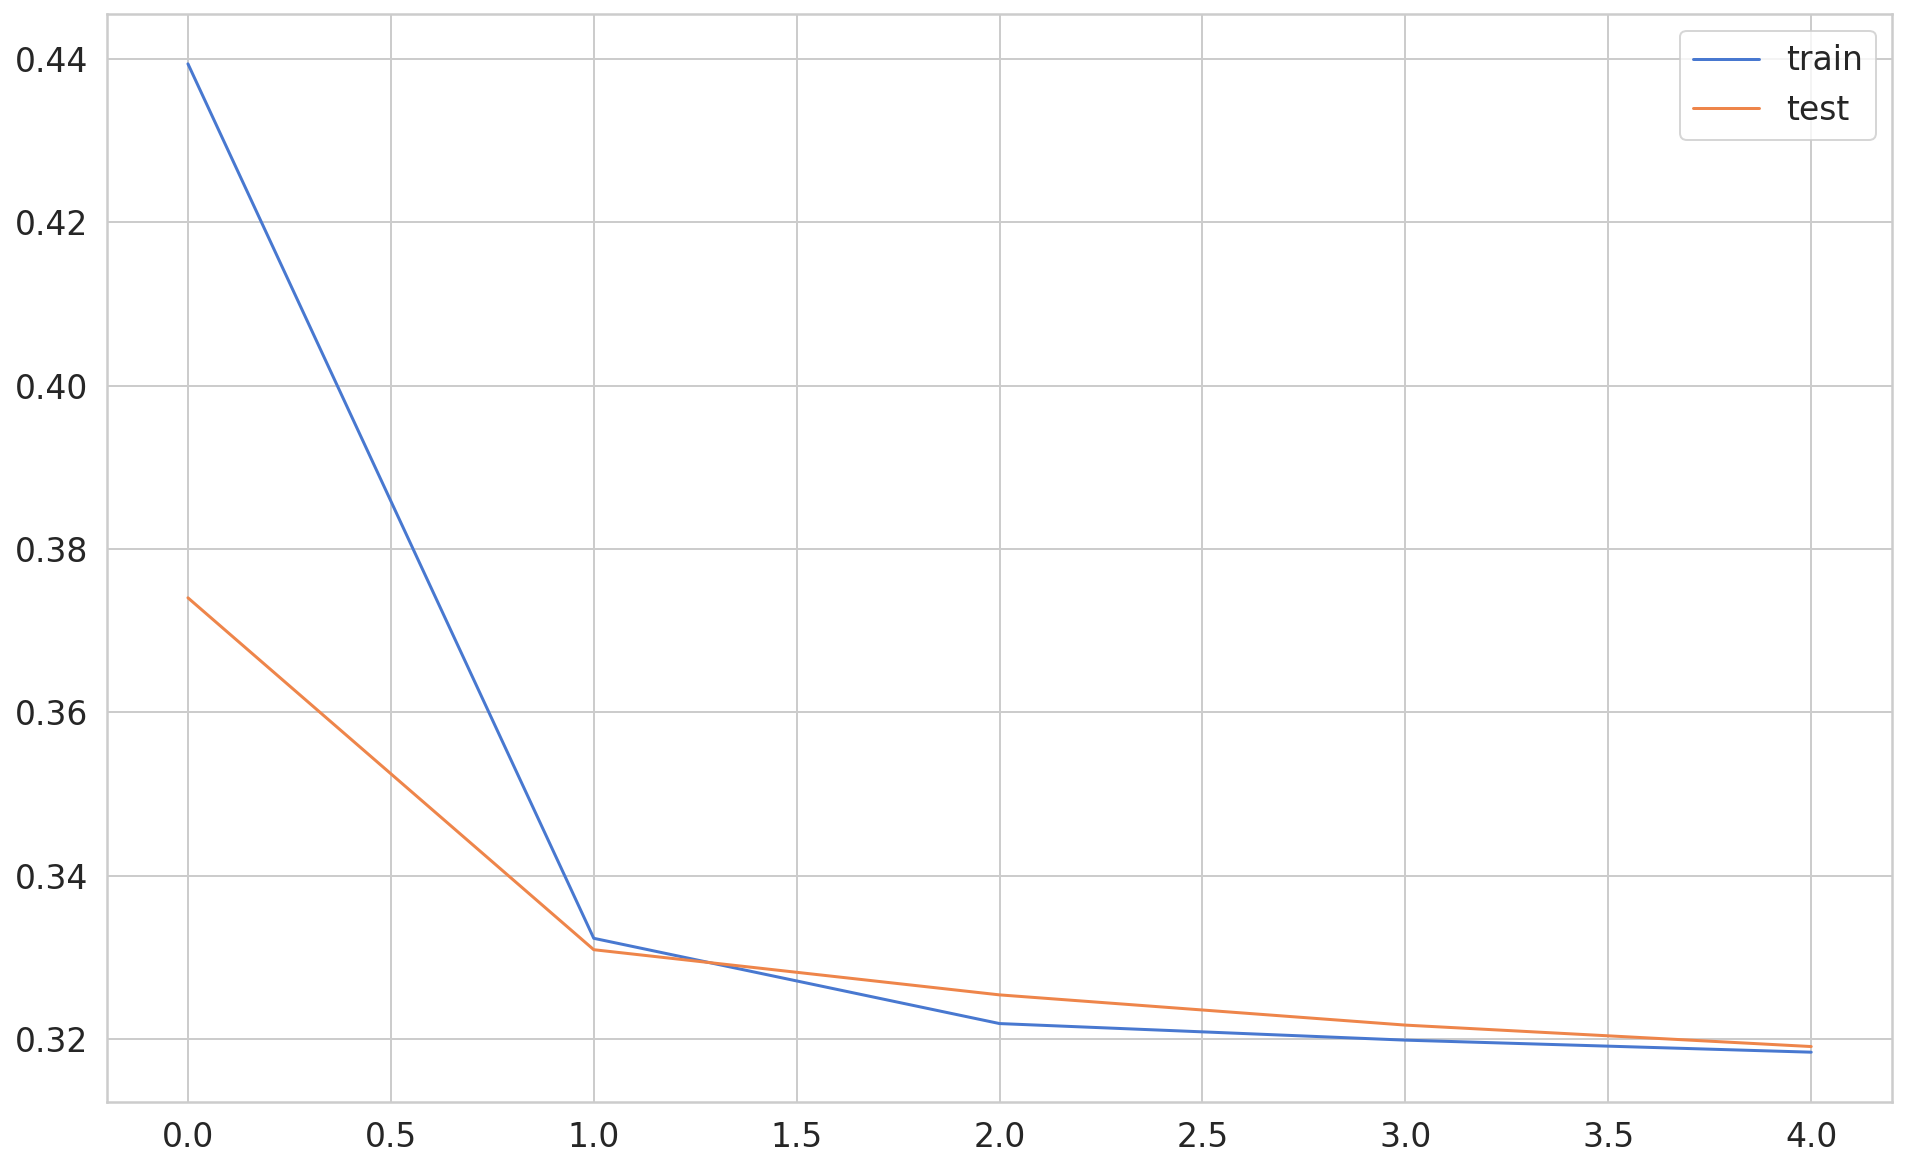

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

Predictions after training:

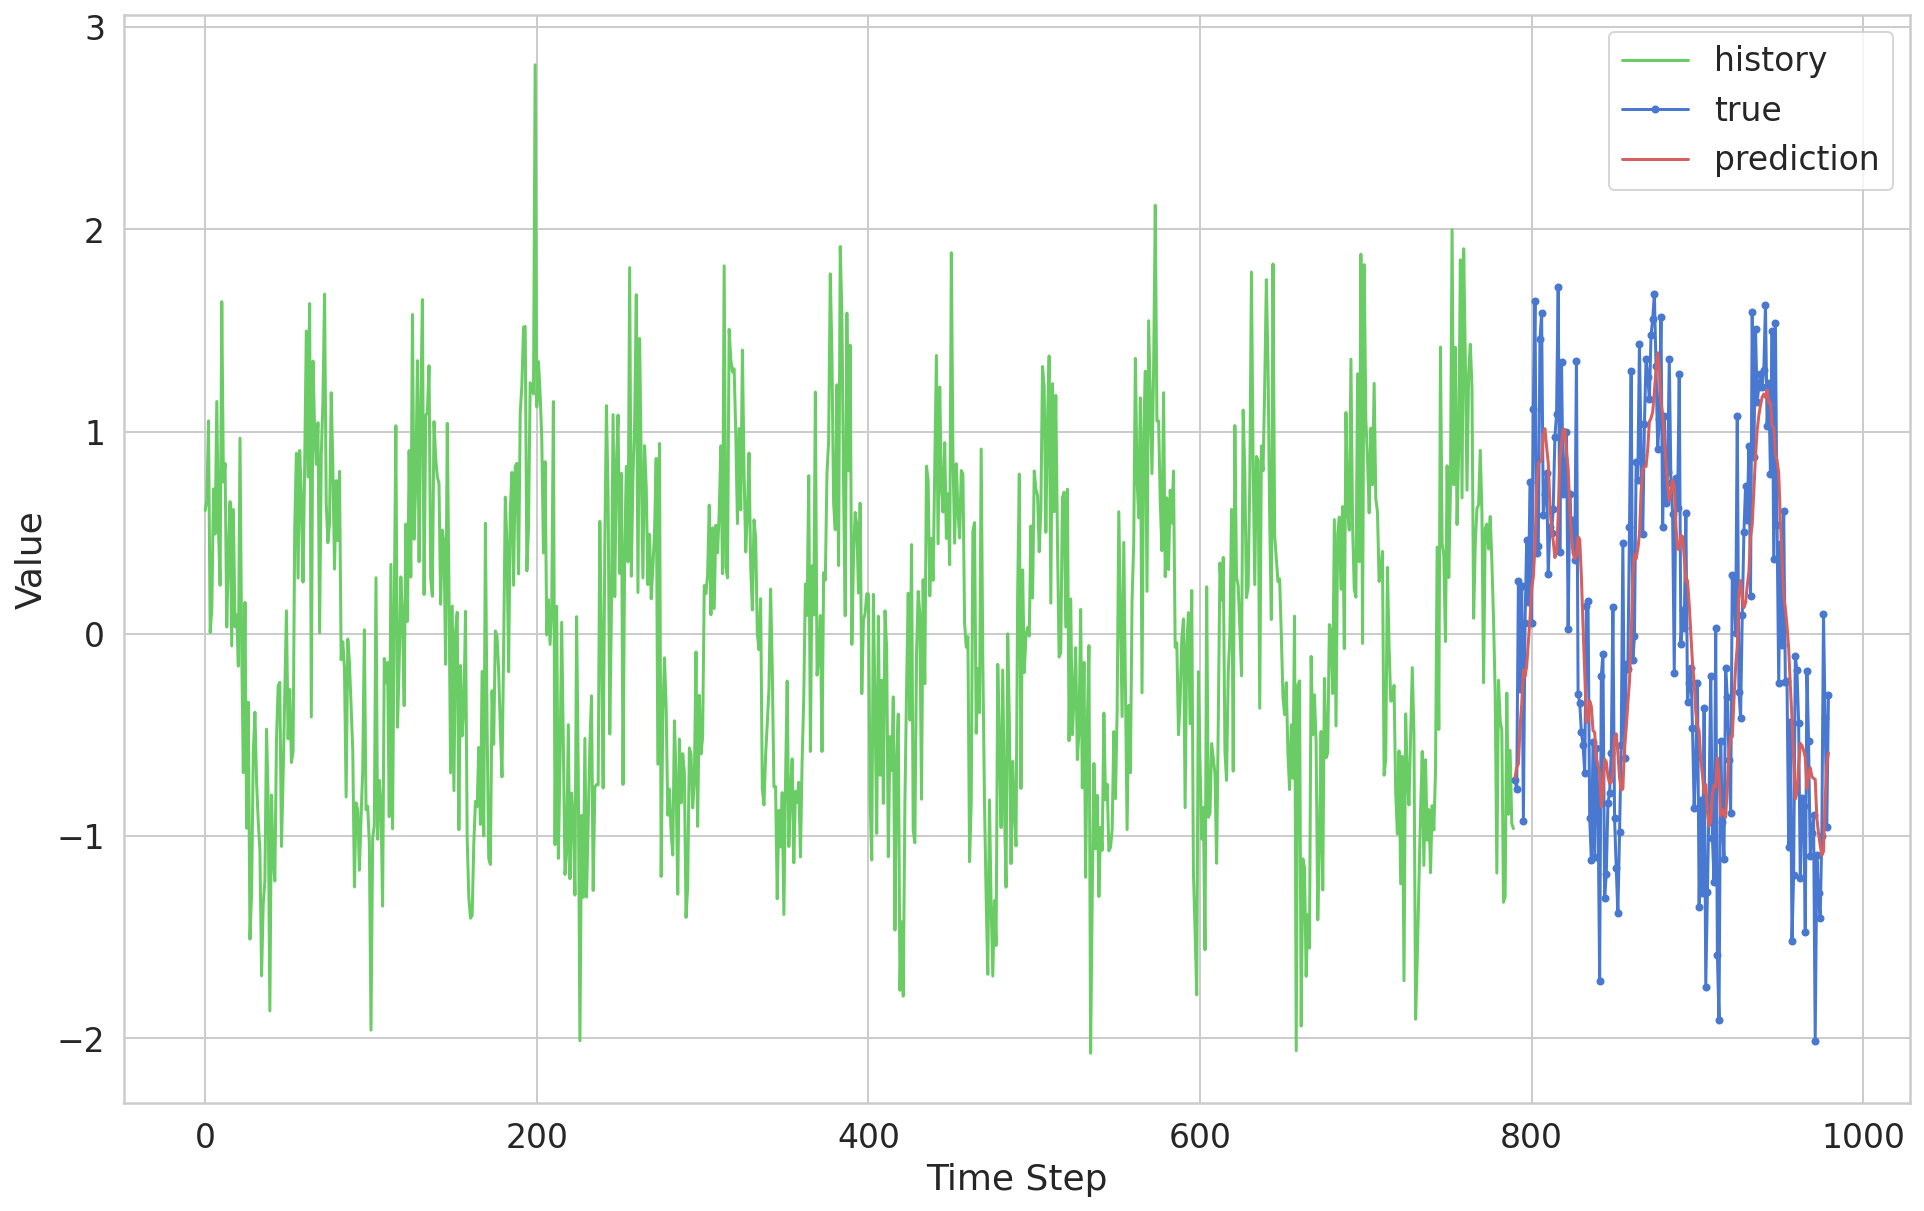

In [15]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

Predictions on test part (zoomed):

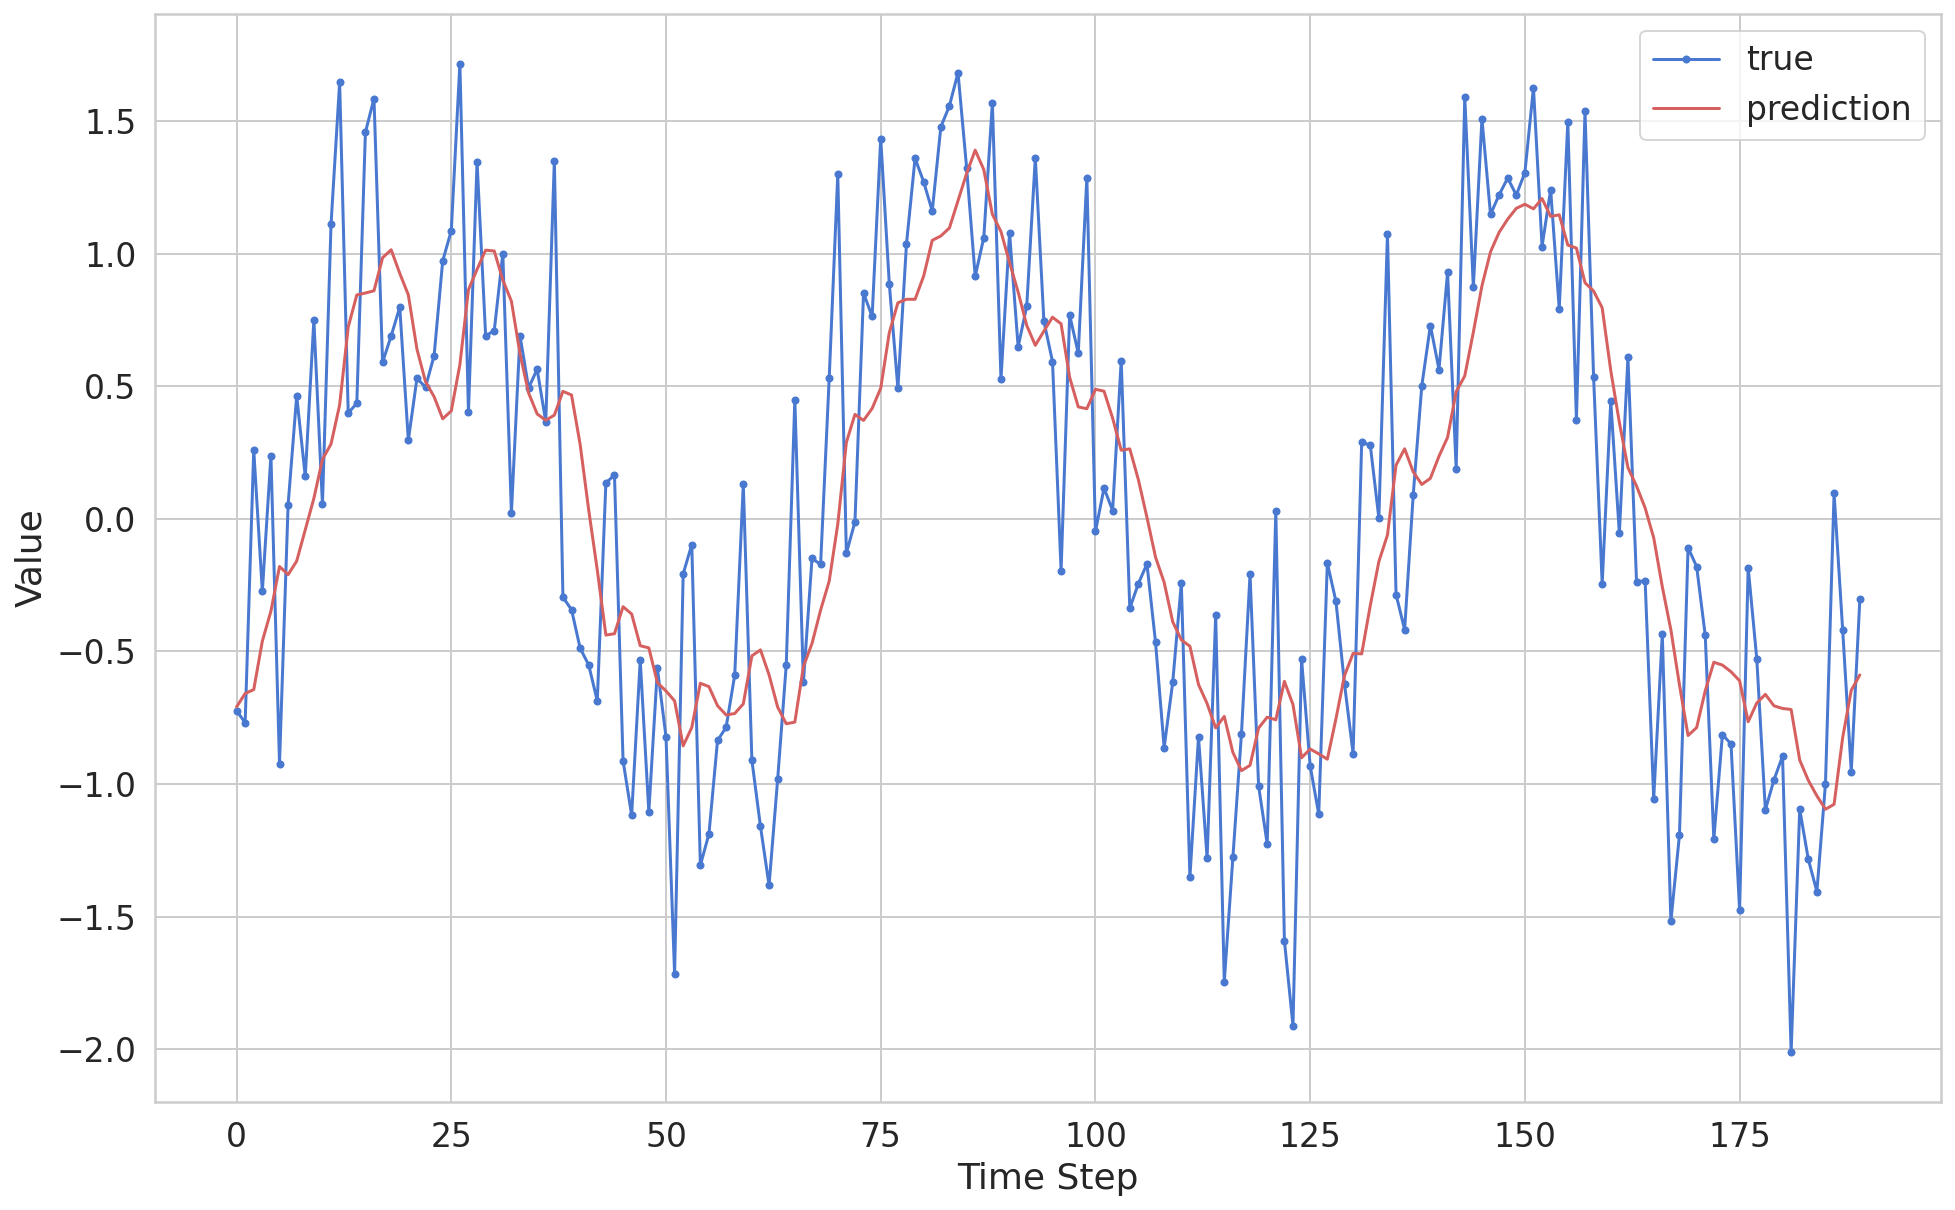

In [16]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

### Useful references:

* Tensorflow guide: [https://www.tensorflow.org/guide](https://www.tensorflow.org/guide)
* Activation functions in TF 2.0: [https://www.tensorflow.org/api_docs/python/tf/keras/activations](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
    * Loss functions in TF 2.0: [https://www.tensorflow.org/api_docs/python/tf/keras/losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
* [https://www.tensorflow.org/tutorials/sequences/recurrent](https://www.tensorflow.org/tutorials/sequences/recurrent)
* [https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651](https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651) (last example above)